#**About Dataset**
The Fashion MNIST dataset is a widely recognized benchmark in the field of machine learning and computer vision, designed to serve as a more challenging alternative to the classic MNIST dataset of handwritten digits. Released by Zalando in 2017, Fashion MNIST consists of 70,000 grayscale images of various clothing items, including shirts, trousers, shoes, and bags, each categorized into ten distinct classes.

With images of size 28x28 pixels, the dataset maintains the same dimensionality as the original MNIST, making it easy for researchers and practitioners to experiment with and compare new algorithms against well-established methods. The introduction of Fashion MNIST reflects a growing interest in applying machine learning techniques to real-world problems, particularly in the fashion industry, where image recognition and classification play a crucial role in inventory management, recommendation systems, and automated design.

By providing a diverse and engaging dataset, Fashion MNIST has become a staple for educational purposes and model benchmarking, inviting both novice and experienced practitioners to explore the complexities of visual recognition in a vibrant and dynamic domain.

|Label|Description|
|-----|-----------|
|0    |T-shirt/top|
|1    |Trouser    |
|2    |Pullover   |
|3    |Dress      |
|4    |Coat       |
|5    |Sandal     |
|6    |Shirt      |
|7    |Sneaker    |
|8    |Bag        |
|9    |Ankle boot |

In [1]:
import warnings
warnings.filterwarnings('ignore')

#**Importing the Dataset**

In [2]:
from tensorflow.keras.datasets import fashion_mnist

#**Loading the Dataset**

In [3]:
(x_train, y_train), (x_test,y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


#**Checking Shape of Train & Test Data**

In [4]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

#**Visualizing any image**

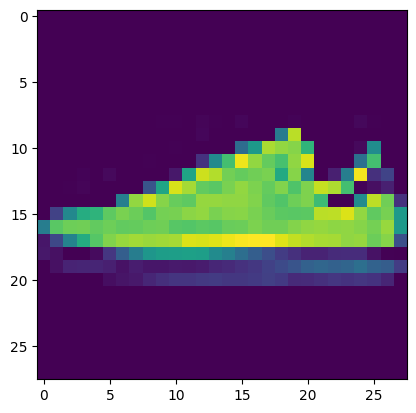

In [5]:
import matplotlib.pyplot as plt
plt.imshow(x_train[6])

#**Checking Label of visualized image**

In [6]:
y_train[6]

7

#**Preprocessing the Dataset**

##**Flattening the Dataset**

In [7]:
x_train_new = x_train.reshape(60000,-1)
x_test_new = x_test.reshape(10000,-1)

##**Scaling the Dataset**

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x_train_new)
x_train_new = scaler.transform(x_train_new)
x_test_new = scaler.transform(x_test_new)

In [9]:
from tensorflow.keras.utils import to_categorical
y_train_new = to_categorical(y_train)
y_test_new = to_categorical(y_test)

#**Machine Learning Model**

##**Model Selection**

In [10]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

##**Training the model**

In [11]:
rfc.fit(x_train_new, y_train)

RandomForestClassifier()

##**Model Testing**

In [12]:
y_pred = rfc.predict(x_test_new)

##**Calculating the metrics**

In [13]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8762

In [14]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[855,   0,  12,  29,   4,   1,  87,   0,  12,   0],
       [  5, 960,   3,  21,   4,   0,   5,   0,   2,   0],
       [ 12,   0, 798,  10, 123,   0,  52,   0,   5,   0],
       [ 20,   3,  12, 904,  28,   0,  30,   0,   2,   1],
       [  0,   0,  87,  35, 823,   0,  52,   0,   3,   0],
       [  0,   0,   0,   0,   0, 956,   0,  30,   3,  11],
       [153,   1, 120,  28,  85,   0, 595,   0,  18,   0],
       [  0,   0,   0,   0,   0,  12,   0, 952,   0,  36],
       [  0,   2,   4,   2,   5,   2,   8,   5, 972,   0],
       [  0,   0,   0,   0,   0,   8,   0,  43,   2, 947]])

#**Deep Learning Model**

##**Model Selection**

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [16]:
ann = Sequential()
ann.add(Dense(128, activation = 'relu', input_dim = 28*28))
ann.add(Dense(64, activation = 'relu'))
ann.add(Dense(10, activation = 'softmax'))

In [17]:
ann.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

##**Training the model**

In [18]:
history = ann.fit(x_train_new, y_train_new, epochs=20, batch_size = 32, validation_split= 0.2)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7669 - loss: 0.6667 - val_accuracy: 0.8465 - val_loss: 0.4222
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8579 - loss: 0.3886 - val_accuracy: 0.8631 - val_loss: 0.3807
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8731 - loss: 0.3503 - val_accuracy: 0.8717 - val_loss: 0.3550
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8826 - loss: 0.3168 - val_accuracy: 0.8692 - val_loss: 0.3790
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8883 - loss: 0.3004 - val_accuracy: 0.8714 - val_loss: 0.3512
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8957 - loss: 0.2811 - val_accuracy: 0.8850 - val_loss: 0.3269
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9007 - loss: 0.2678 - val_accuracy: 0.8835 - val_loss: 0.3238
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9018 - loss: 0.2573 - 

##**Testing the model and Calculating the metrics**

In [19]:
ann.evaluate(x_test_new, y_test_new)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8800 - loss: 0.3819


[0.3855457603931427, 0.8830999732017517]

##**Plotting Model Loss**

In [20]:
print(type(history.history))
print(history.history.keys())

<class 'dict'>
dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


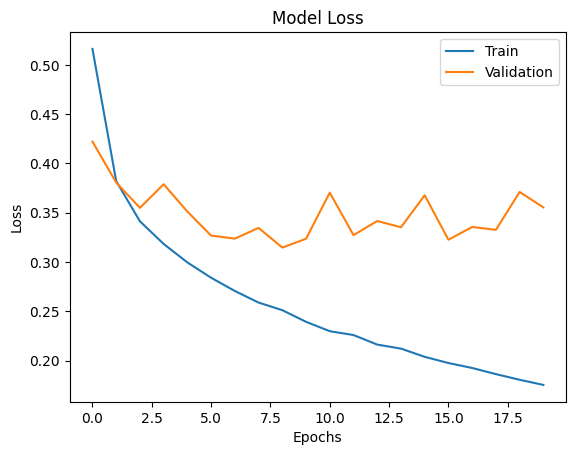

In [21]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()